# PUSL3189 - Natural Language Processing

Malindu Wickramasinghe

10899497

10899497@students.plymouth.ac.uk

### Task 1: Introduction to NLP and Data Collection

To gather the comment from facebook, I have used "facebook-page-scraper" library to scrape comments related to "Gender and Sexual Orientation". This library scrape comments from the users and save it to an Excel file.

In [ ]:
pip install facebook-page-scraper

In [ ]:
def __wait_for_element_to_appear(driver, layout):

    try:
        if layout == "old":
            # Await page loading so that posts appear.
            body = driver.find_element(By.CSS_SELECTOR, "body")
            for _ in range(randint(3, 5)):
                body.send_keys(Keys.PAGE_DOWN)
            WebDriverWait(driver, 30).until(EC.presence_of_element_located(
                (By.CSS_SELECTOR, '.userContentWrapper')))
        elif layout == "new":
            WebDriverWait(driver, 30).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "[aria-posinset]")))
    except WebDriverException:
        # If it was not found, it either doesn't exist or the website isn't loading.
        print("No posts were found!")
        Utilities.__close_driver(driver)
        # exit the program, because if posts does not exists,we cannot go further
        sys.exit(1)
    except Exception as ex:
        print("error at wait_for_element_to_appear method : {}".format(ex))
        Utilities.__close_driver(driver)
    allow_span = driver.find_element(
        By.XPATH, '"C:\Users\malin\Downloads\nlp dataset.xlsx"')
    allow_span.click()

The dataset contains "'id', 'email', 'firstName', 'lastName', 'postId', 'postText', 'postAuthor', 'postAuthorId', 'postAuthorUrl', 'commentId', 'commentText', 'commentAuthorName', 'commentAuthorId', 'commentAuthorUrl', 'timestamp', 'commentUrl'," of the Facebook post and comment. There are many blank cell since some profiles are set to private.

Since there are two columns with text, we need to Preprocess both columns

Installing necessary libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

### Import Dataset

In [ ]:
#Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('C:/Users/malin/Downloads/New folder (3)/nlp dataset.xlsx')
df.head()

id email firstName  \
0  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkxNDEzMD...   NaN  Jennifer   
1  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkxNDIxMj...   NaN      Niki   
2  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkzNzgzOD...   NaN     Cathy   
3  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkxMjEyNz...   NaN      Sara   
4  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDk2Mzc3Nz...   NaN     RevDr   

    lastName        postId postText  postAuthor  postAuthorId  postAuthorUrl  \
0    LeBlanc  2.049111e+15      NaN         NaN           NaN            NaN   
1   Thornton  2.049111e+15      NaN         NaN           NaN            NaN   
2  Bergstrom  2.049111e+15      NaN         NaN           NaN            NaN   
3       Lamb  2.049111e+15      NaN         NaN           NaN            NaN   
4     Sharon  2.049111e+15      NaN         NaN           NaN            NaN   

                                           commentId  \
0  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkxNDEzMD...   
1  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkxNDIxMj...   
2  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkzNzgzOD...   
3  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDkxMjEyNz...   
4  Y29tbWVudDoyMDQ5MTExMjA4ODk4NzcyXzIwNDk2Mzc3Nz...   

                                         commentText  \
0  Oh, no. Not our bloodlines! Whatever will we d...   
1  That’s a lot of words for “no one will sleep w...   
2                          Just another way to shame   
3  Spoken like an old resentful man who has been ...   
4  I don’t know if any of my ancestors fought mou...   

            commentAuthorName  commentAuthorId  \
0  Jennifer LeBlanc Easterday     1.000027e+14   
1               Niki Thornton     1.117008e+08   
2             Cathy Bergstrom     1.000220e+14   
3                   Sara Lamb     6.009165e+08   
4     RevDr Sharon Wozencraft     1.000010e+14   

                                    commentAuthorUrl     timestamp  \
0      https://www.facebook.com/jennifer.l.easterday  1.733165e+09   
1                https://www.facebook.com/niki.banes  1.733165e+09   
2        https://www.facebook.com/cathy.bergstrom.10  1.733197e+09   
3              https://www.facebook.com/sara.lamb.14  1.733163e+09   
4  https://www.facebook.com/Rev.Dr.Sharon.A.Wozen...  1.733226e+09   

                                          commentUrl  
0  https://www.facebook.com/groups/WomensRightsNe...  
1  https://www.facebook.com/groups/WomensRightsNe...  
2  https://www.facebook.com/groups/WomensRightsNe...  
3  https://www.facebook.com/groups/WomensRightsNe...  
4  https://www.facebook.com/groups/WomensRightsNe...

In [ ]:
# dataset stats
df.describe()

postId  postAuthor  postAuthorId  postAuthorUrl  commentAuthorId  \
count  8.880000e+02         0.0           0.0            0.0     8.880000e+02   
mean   5.037172e+15         NaN           NaN            NaN     5.820004e+13   
std    3.653827e+15         NaN           NaN            NaN     4.849093e+13   
min    9.346887e+14         NaN           NaN            NaN     3.427400e+04   
25%    1.532870e+15         NaN           NaN            NaN     1.211208e+09   
50%    3.230826e+15         NaN           NaN            NaN     1.000004e+14   
75%    9.196598e+15         NaN           NaN            NaN     1.000099e+14   
max    9.924683e+15         NaN           NaN            NaN     1.000947e+14   

          timestamp  
count  8.880000e+02  
mean   1.728109e+09  
std    2.661195e+07  
min    1.500234e+09  
25%    1.732059e+09  
50%    1.732854e+09  
75%    1.733181e+09  
max    1.733238e+09

In [ ]:
df.shape

(2905, 16)

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 888 non-null    object 
 1   email              1 non-null      object 
 2   firstName          888 non-null    object 
 3   lastName           885 non-null    object 
 4   postId             888 non-null    float64
 5   postText           716 non-null    object 
 6   postAuthor         0 non-null      float64
 7   postAuthorId       0 non-null      float64
 8   postAuthorUrl      0 non-null      float64
 9   commentId          888 non-null    object 
 10  commentText        845 non-null    object 
 11  commentAuthorName  888 non-null    object 
 12  commentAuthorId    888 non-null    float64
 13  commentAuthorUrl   888 non-null    object 
 14  timestamp          888 non-null    float64
 15  commentUrl         888 non-null    object 
dtypes: float64(6), object(10

In [ ]:
# check for null values
df.isnull().sum()

id                   2017
email                2904
firstName            2017
lastName             2020
postId               2017
postText             2189
postAuthor           2905
postAuthorId         2905
postAuthorUrl        2905
commentId            2017
commentText          2060
commentAuthorName    2017
commentAuthorId      2017
commentAuthorUrl     2017
timestamp            2017
commentUrl           2017
dtype: int64

A new dataframe is created with only commenttext and posttext columns

In [ ]:
dfcleaned=df[['commentText','postText']]

In [ ]:
# check for null values
dfcleaned.isnull().sum()

postText       0
commentText    0
dtype: int64

In [ ]:
dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  
0  Oh, no. Not our bloodlines! Whatever will we d...  
1  That’s a lot of words for “no one will sleep w...  
2                          Just another way to shame  
3  Spoken like an old resentful man who has been ...  
4  I don’t know if any of my ancestors fought mou...

# Task 2: Text Preprocessing and Tokenization

The corpus should be created by adding "comment_Text" and "post_Text" column. We need to remove stop words,any special characters or punctuation.


Removing duplicate values in 'commentText' and 'postText' columns.

In [ ]:
# Remove duplicates values of dataframe commentText and postText columns.

dfcleaned = df.drop_duplicates(subset=['commentText', 'postText'])

In [ ]:

dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  
0  Oh, no. Not our bloodlines! Whatever will we d...  
1  That’s a lot of words for “no one will sleep w...  
2                          Just another way to shame  
3  Spoken like an old resentful man who has been ...  
4  I don’t know if any of my ancestors fought mou...

# Removing stopwords and special characters

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return " ".join(no_stopword_text)

dfcleaned['cleanedpostText'] = dfcleaned['postText'].astype(str).apply(lambda x: remove_stopwords(x))
dfcleaned['cleanedcommentText'] = dfcleaned['commentText'].astype(str).apply(lambda x: remove_stopwords(x))


Removing special characters and emojis

In [ ]:
dfcleaned['cleanedpostText'] = dfcleaned['cleanedpostText'].str.replace(r"[^a-zA-Z0-9 ]", " ", regex=True)
dfcleaned['cleanedcommentText'] = dfcleaned['cleanedcommentText'].str.replace(r"[^a-zA-Z0-9 ]", " ", regex=True)


# Define a function to remove emojis and exclamation marks
def emojisremove(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"  # Dingbats
                                u"\U000024C2-\U0001F251"  # Enclosed characters
                                "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    # Remove exclamation marks
    text = text.replace("!", "")

    return text

# Apply the cleaning function to the columns
dfcleaned['cleanedpostText'] = dfcleaned['cleanedpostText'].apply(emojisremove)
dfcleaned['cleanedcommentText'] = dfcleaned['cleanedcommentText'].apply(emojisremove)


Cleaning the text

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

    dfcleaned['cleanedpostText'] = dfcleaned['cleanedpostText'].astype(str).apply(lambda x: clean_text(x))
    dfcleaned['cleanedcommentText'] = dfcleaned['cleanedcommentText'].astype(str).apply(lambda x: clean_text(x))

In [ ]:
dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  \
0  Oh, no. Not our bloodlines! Whatever will we d...   
1  That’s a lot of words for “no one will sleep w...   
2                          Just another way to shame   
3  Spoken like an old resentful man who has been ...   
4  I don’t know if any of my ancestors fought mou...   

                                     cleanedpostText  \
0                                           mic join   
1  https   www borowitzreport com p kari lake cal...   
2                                         Mmmm         
3                        Smokheads545 7251971 need 3   
4  Green Party Tennessee   The party people  plan...   

                                  cleanedcommentText  
0  Oh  no  Not bloodlines  Whatever do   reclines...  
1                That s lot words  no one sleep me    
2                             Just another way shame  
3    Spoken like old resentful man bested way woman   
4  I don t know ancestors fought mountain lions  ...

# Tokenization

In [ ]:
import spacy


# Load the SpaCy language model
nlp = spacy.load("en_core_web_sm")

# Tokenize using SpaCy

def tokenize_with_spacy(text):
    if isinstance(text, list):  # Check if text is a list
        text = " ".join(text)  # Join list elements into a string
    doc = nlp(text)  # Process the text with SpaCy
    tokens = [token.text for token in doc]  # Extract tokens
    return tokens

# individual words considered as tokens
dfcleaned['TokenizationpostText'] = dfcleaned['cleanedpostText'].apply(lambda sentence: tokenize_with_spacy(sentence))
dfcleaned['TokenizationcommentText'] = dfcleaned['cleanedcommentText'].apply(lambda sentence: tokenize_with_spacy(sentence))
dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  \
0  Oh, no. Not our bloodlines! Whatever will we d...   
1  That’s a lot of words for “no one will sleep w...   
2                          Just another way to shame   
3  Spoken like an old resentful man who has been ...   
4  I don’t know if any of my ancestors fought mou...   

                                     cleanedpostText  \
0                                           mic join   
1  https   www borowitzreport com p kari lake cal...   
2                                         Mmmm         
3                        Smokheads545 7251971 need 3   
4  Green Party Tennessee   The party people  plan...   

                                  cleanedcommentText  \
0  Oh  no  Not bloodlines  Whatever do   reclines...   
1                That s lot words  no one sleep me     
2                             Just another way shame   
3    Spoken like old resentful man bested way woman    
4  I don t know ancestors fought mountain lions  ...   

                                TokenizationpostText  \
0                                        [mic, join]   
1  [https,   , www, borowitzreport, com, p, kari,...   
2                                      [Mmmm,      ]   
3                   [Smokheads545, 7251971, need, 3]   
4  [Green, Party, Tennessee,   , The, party, peop...   

                             TokenizationcommentText  
0  [Oh,  , no,  , Not, bloodlines,  , Whatever, d...  
1    [That, s, lot, words,  , no, one, sleep, me,  ]  
2                        [Just, another, way, shame]  
3  [Spoken, like, old, resentful, man, bested, wa...  
4  [I, don, t, know, ancestors, fought, mountain,...

# Stemming

In [ ]:
# stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#Applying for the columns
dfcleaned['stemmedpostText'] = dfcleaned['TokenizationpostText'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])
dfcleaned['stemmedcommentText'] = dfcleaned['TokenizationcommentText'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])
dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  \
0  Oh, no. Not our bloodlines! Whatever will we d...   
1  That’s a lot of words for “no one will sleep w...   
2                          Just another way to shame   
3  Spoken like an old resentful man who has been ...   
4  I don’t know if any of my ancestors fought mou...   

                                     cleanedpostText  \
0                                           mic join   
1  https   www borowitzreport com p kari lake cal...   
2                                         Mmmm         
3                        Smokheads545 7251971 need 3   
4  Green Party Tennessee   The party people  plan...   

                                  cleanedcommentText  \
0  Oh  no  Not bloodlines  Whatever do   reclines...   
1                That s lot words  no one sleep me     
2                             Just another way shame   
3    Spoken like old resentful man bested way woman    
4  I don t know ancestors fought mountain lions  ...   

                                TokenizationpostText  \
0                                        [mic, join]   
1  [https,   , www, borowitzreport, com, p, kari,...   
2                                      [Mmmm,      ]   
3                   [Smokheads545, 7251971, need, 3]   
4  [Green, Party, Tennessee,   , The, party, peop...   

                             TokenizationcommentText  \
0  [Oh,  , no,  , Not, bloodlines,  , Whatever, d...   
1    [That, s, lot, words,  , no, one, sleep, me,  ]   
2                        [Just, another, way, shame]   
3  [Spoken, like, old, resentful, man, bested, wa...   
4  [I, don, t, know, ancestors, fought, mountain,...   

                                     stemmedpostText  \
0                                        [mic, join]   
1  [http,   , www, borowitzreport, com, p, kari, ...   
2                                      [mmmm,      ]   
3                   [smokheads545, 7251971, need, 3]   
4  [green, parti, tennesse,   , the, parti, peopl...   

                                  stemmedcommentText  
0  [oh,  , no,  , not, bloodlin,  , whatev, do,  ...  
1     [that, s, lot, word,  , no, one, sleep, me,  ]  
2                          [just, anoth, way, shame]  
3  [spoken, like, old, resent, man, best, way, wo...  
4  [i, don, t, know, ancestor, fought, mountain, ...

# Lemmatization

In [ ]:
import spacy

# Lemmatization function
def lemmatize_with_spacy(tokens):
    if isinstance(tokens, list):
        tokens = " ".join(tokens)
    doc = nlp(tokens)  # Process the text
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens


# Apply stemming directly to the tokenized sentences
dfcleaned['lemmatizedpostText'] = dfcleaned['cleanedpostText'].astype(str).apply(lemmatize_with_spacy)
dfcleaned['lemmatizedcommentText'] = dfcleaned['cleanedcommentText'].astype(str).apply(lemmatize_with_spacy)

dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  \
0  Oh, no. Not our bloodlines! Whatever will we d...   
1  That’s a lot of words for “no one will sleep w...   
2                          Just another way to shame   
3  Spoken like an old resentful man who has been ...   
4  I don’t know if any of my ancestors fought mou...   

                                     cleanedpostText  \
0                                           mic join   
1  https   www borowitzreport com p kari lake cal...   
2                                         Mmmm         
3                        Smokheads545 7251971 need 3   
4  Green Party Tennessee   The party people  plan...   

                                  cleanedcommentText  \
0  Oh  no  Not bloodlines  Whatever do   reclines...   
1                That s lot words  no one sleep me     
2                             Just another way shame   
3    Spoken like old resentful man bested way woman    
4  I don t know ancestors fought mountain lions  ...   

                                TokenizationpostText  \
0                                        [mic, join]   
1  [https,   , www, borowitzreport, com, p, kari,...   
2                                      [Mmmm,      ]   
3                   [Smokheads545, 7251971, need, 3]   
4  [Green, Party, Tennessee,   , The, party, peop...   

                             TokenizationcommentText  \
0  [Oh,  , no,  , Not, bloodlines,  , Whatever, d...   
1    [That, s, lot, words,  , no, one, sleep, me,  ]   
2                        [Just, another, way, shame]   
3  [Spoken, like, old, resentful, man, bested, wa...   
4  [I, don, t, know, ancestors, fought, mountain,...   

                                     stemmedpostText  \
0                                        [mic, join]   
1  [http,   , www, borowitzreport, com, p, kari, ...   
2                                      [mmmm,      ]   
3                   [smokheads545, 7251971, need, 3]   
4  [green, parti, tennesse,   , the, parti, peopl...   

                                  stemmedcommentText  \
0  [oh,  , no,  , not, bloodlin,  , whatev, do,  ...   
1     [that, s, lot, word,  , no, one, sleep, me,  ]   
2                          [just, anoth, way, shame]   
3  [spoken, like, old, resent, man, best, way, wo...   
4  [i, don, t, know, ancestor, fought, mountain, ...   

                                  lemmatizedpostText  \
0                                        [mic, join]   
1  [https,   , www, borowitzreport, com, p, kari,...   
2                                      [Mmmm,      ]   
3                   [Smokheads545, 7251971, need, 3]   
4  [Green, Party, Tennessee,   , the, party, peop...   

                               lemmatizedcommentText  
0  [oh,  , no,  , not, bloodline,  , whatever, do...  
1      [that, s, lot, word,  , no, one, sleep, I,  ]  
2                        [just, another, way, shame]  
3  [speak, like, old, resentful, man, best, way, ...  
4  [I, don, t, know, ancestor, fight, mountain, l...

Checking lemmatization or stemming is best for the dataset

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Function to calculate cosine similarity
def compare_similarity(lemmatized_texts, stemmed_texts):
    vectorizer = CountVectorizer(analyzer=lambda x: x)  # Use word lists directly
    # Combine texts into a single list of sentences
    combined_text = lemmatized_texts + stemmed_texts
    vectors = vectorizer.fit_transform(combined_text).toarray()

    # Split vectors
    lemmatized_vectors = vectors[: len(lemmatized_texts)]
    stemmed_vectors = vectors[len(lemmatized_texts):]

    # Compute cosine similarity between the lemmatized and stemmed vectors
    similarity_scores = cosine_similarity(stemmed_vectors, lemmatized_vectors)

    return similarity_scores


# Calculate similarity between lemmatized and stemmed sentences
similarity_scores = compare_similarity(dfcleaned['lemmatizedpostText'].tolist(), dfcleaned['stemmedpostText'].tolist())

# Print similarity scores
for i, score in enumerate(similarity_scores):
    print(f"Sentence {i + 1}:")
    print(f"Original lemmatized sentence: {dfcleaned['lemmatizedpostText'][i]}")
    print(f"Stemmed sentence: {dfcleaned['stemmedpostText'][i]}")
    print(f"Similarity score: {score[0]}\n")


Sentence 1:
Original lemmatized sentence: ['mic', 'join']
Stemmed sentence: ['mic', 'join']
Similarity score: 0.9999999999999998

Sentence 2:
Original lemmatized sentence: ['https', '  ', 'www', 'borowitzreport', 'com', 'p', 'kari', 'lake', 'call', 'it', 'totally', 'unfair', 'r', '3ju40n', 'utm', 'campaign', 'post', 'utm', 'medium', 'web', 'PHOENIX', ' ', 'the', 'Borowitz', 'Report', ' ', 'after', 'fail', 'bid', 'US', 'Senate', 'make', 'two', 'time', 'loser', ' ', 'irate', 'Kari', 'Lake', 'complain', 'Monday', ' ', 'totally', 'unfair', ' ', 'Republican', 'Party', 'suddenly', 'decide', 'accept', 'election', 'result', '  ', 'I', 'think', 'go', 'frivolous', 'lawsuit', 'baseless', 'claim', 'voter', 'fraud', 'like', 'always', 'do', '  ', 'say', '  ', 'I', 'long', 'recognize', 'Republican', 'Party', '   ', 'where', 'election', 'denier', 'need', 'they', '  ', 'ask', 'Lake', ' ', 'call', ' ', 'an', 'election', 'deni', 'deni', '   ', 'where', 's', 'QAnon', 'Shaman', '  ', 'demand', '  ', 'where

By the results, Lemmatization is best for the dataset.

combine words into single sentence

In [ ]:
def combine_words(tokens):
    return " ".join(tokens)

# Apply the transformation using apply()
dfcleaned['sentencedlemmatizedpostText'] = dfcleaned['lemmatizedpostText'].apply(lambda x: combine_words(x))
dfcleaned['sentencedlemmatizedcommentText'] = dfcleaned['lemmatizedcommentText'].apply(lambda x: combine_words(x))

dfcleaned.head()

postText  \
0                                 have a mic join me   
1  https://www.borowitzreport.com/p/kari-lake-cal...   
2                                         Mmmm . . .   
3                        Smokheads545#7251971 need 3   
4  Green Party of Tennessee ~\nThe party for the ...   

                                         commentText  \
0  Oh, no. Not our bloodlines! Whatever will we d...   
1  That’s a lot of words for “no one will sleep w...   
2                          Just another way to shame   
3  Spoken like an old resentful man who has been ...   
4  I don’t know if any of my ancestors fought mou...   

                                     cleanedpostText  \
0                                           mic join   
1  https   www borowitzreport com p kari lake cal...   
2                                         Mmmm         
3                        Smokheads545 7251971 need 3   
4  Green Party Tennessee   The party people  plan...   

                                  cleanedcommentText  \
0  Oh  no  Not bloodlines  Whatever do   reclines...   
1                That s lot words  no one sleep me     
2                             Just another way shame   
3    Spoken like old resentful man bested way woman    
4  I don t know ancestors fought mountain lions  ...   

                                TokenizationpostText  \
0                                        [mic, join]   
1  [https,   , www, borowitzreport, com, p, kari,...   
2                                      [Mmmm,      ]   
3                   [Smokheads545, 7251971, need, 3]   
4  [Green, Party, Tennessee,   , The, party, peop...   

                             TokenizationcommentText  \
0  [Oh,  , no,  , Not, bloodlines,  , Whatever, d...   
1    [That, s, lot, words,  , no, one, sleep, me,  ]   
2                        [Just, another, way, shame]   
3  [Spoken, like, old, resentful, man, bested, wa...   
4  [I, don, t, know, ancestors, fought, mountain,...   

                                     stemmedpostText  \
0                                        [mic, join]   
1  [http,   , www, borowitzreport, com, p, kari, ...   
2                                      [mmmm,      ]   
3                   [smokheads545, 7251971, need, 3]   
4  [green, parti, tennesse,   , the, parti, peopl...   

                                  stemmedcommentText  \
0  [oh,  , no,  , not, bloodlin,  , whatev, do,  ...   
1     [that, s, lot, word,  , no, one, sleep, me,  ]   
2                          [just, anoth, way, shame]   
3  [spoken, like, old, resent, man, best, way, wo...   
4  [i, don, t, know, ancestor, fought, mountain, ...   

                                  lemmatizedpostText  \
0                                        [mic, join]   
1  [https,   , www, borowitzreport, com, p, kari,...   
2                                      [Mmmm,      ]   
3                   [Smokheads545, 7251971, need, 3]   
4  [Green, Party, Tennessee,   , the, party, peop...   

                               lemmatizedcommentText  \
0  [oh,  , no,  , not, bloodline,  , whatever, do...   
1      [that, s, lot, word,  , no, one, sleep, I,  ]   
2                        [just, another, way, shame]   
3  [speak, like, old, resentful, man, best, way, ...   
4  [I, don, t, know, ancestor, fight, mountain, l...   

                         sentencedlemmatizedpostText  \
0                                           mic join   
1  https    www borowitzreport com p kari lake ca...   
2                                         Mmmm         
3                        Smokheads545 7251971 need 3   
4  Green Party Tennessee    the party people   pl...   

                      sentencedlemmatizedcommentText  
0  oh   no   not bloodline   whatever do    recli...  
1                 that s lot word   no one sleep I    
2                             just another way shame  
3        speak like old resentful man best way woman  
4  I don t know ancestor fight mountain lion   I ...

# N - Gram

perform  a bigram and trigram to 'sentencedlemmatizedpostText'column and 'sentencedlemmatizedcommentText' columns

In [ ]:
#perform  a n-gram to dfclenaed['stemmedcommentText'] column

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # Download the necessary punkt_tab data package
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer


# Function to perform n-gram
def get_n_grams(text, n):
    if isinstance(text,str):
        tokens = nltk.word_tokenize(text)
        n_grams = zip(*[tokens[i:] for i in range(n)])
        return [" ".join(ngram) for ngram in n_grams]
    else:
      return []

# Example usage: bigram (n=2)
def generate_ngrams(df, column_name, n):
  return df[column_name].apply(lambda x: get_n_grams(x, n))

# Generate bigrams for the 'stemmedcommentText' column
dfcleaned['bigrams_stemmedcommentText'] = generate_ngrams(dfcleaned,'sentencedlemmatizedcommentText', 2)
dfcleaned['trigrams_stemmedcommentText'] = generate_ngrams(dfcleaned,'sentencedlemmatizedcommentText', 3)

# Generate trigrams for the 'stemmedcommentText' column
dfcleaned['bigrams_stemmedpostText'] = generate_ngrams(dfcleaned,'sentencedlemmatizedpostText', 2)
dfcleaned['trigrams_stemmedpostText'] = generate_ngrams(dfcleaned,'sentencedlemmatizedpostText', 3)

In [ ]:
dfcleaned

postText  \
0                                   have a mic join me   
1    https://www.borowitzreport.com/p/kari-lake-cal...   
2                                           Mmmm . . .   
3                          Smokheads545#7251971 need 3   
4    Green Party of Tennessee ~\nThe party for the ...   
..                                                 ...   
495                              I'm 79 and look older   
496  i feel like Cinderella wanted freedom. ☺️ and ...   
497  The original version of Beauty and the Beast w...   
498                               You never disappoint   
499            So they didn’t live happily ever after?   

                                           commentText  \
0    Oh, no. Not our bloodlines! Whatever will we d...   
1    That’s a lot of words for “no one will sleep w...   
2                            Just another way to shame   
3    Spoken like an old resentful man who has been ...   
4    I don’t know if any of my ancestors fought mou...   
..                                                 ...   
495  Palm Outdoor is Australian owned and made, we ...   
496  Krix is an Australian-made and owned speaker m...   
497  Crochet plants make a lovely desk ornament.  I...   
498                              T's Creative Emporium   
499                                    not cool looser   

                                       cleanedpostText  \
0                                             mic join   
1    https   www borowitzreport com p kari lake cal...   
2                                           Mmmm         
3                          Smokheads545 7251971 need 3   
4    Green Party Tennessee   The party people  plan...   
..                                                 ...   
495                                  I m 79 look older   
496  feel like Cinderella wanted freedom     fair  ...   
497  The original version Beauty Beast commentary w...   
498                               You never disappoint   
499                 So didn t live happily ever after    

                                    cleanedcommentText  \
0    Oh  no  Not bloodlines  Whatever do   reclines...   
1                  That s lot words  no one sleep me     
2                               Just another way shame   
3      Spoken like old resentful man bested way woman    
4    I don t know ancestors fought mountain lions  ...   
..                                                 ...   
495       Palm Outdoor Australian owned made  caravan    
496  Krix Australian made owned speaker manufacture...   
497  Crochet plants make lovely desk ornament  I al...   
498                              T s Creative Emporium   
499                                        cool looser   

                                  TokenizationpostText  \
0                                          [mic, join]   
1    [https,   , www, borowitzreport, com, p, kari,...   
2                                        [Mmmm,      ]   
3                     [Smokheads545, 7251971, need, 3]   
4    [Green, Party, Tennessee,   , The, party, peop...   
..                                                 ...   
495                            [I, m, 79, look, older]   
496  [feel, like, Cinderella, wanted, freedom,     ...   
497  [The, original, version, Beauty, Beast, commen...   
498                           [You, never, disappoint]   
499          [So, didn, t, live, happily, ever, after]   

                               TokenizationcommentText  \
0    [Oh,  , no,  , Not, bloodlines,  , Whatever, d...   
1      [That, s, lot, words,  , no, one, sleep, me,  ]   
2                          [Just, another, way, shame]   
3    [Spoken, like, old, resentful, man, bested, wa...   
4    [I, don, t, know, ancestors, fought, mountain,...   
..                                                 ...   
495  [Palm, Outdoor, Australian, owned, made,  , ca...   
496  [Krix, Australian, made, owned, speaker, manuf...   
497  [Crochet, plants, make, lovely, de

# Task 3: POS Tagging and Named Entity Recognition (NER)

 POS Tagging for "sentencedlemmatizedcommentText" Column

In [ ]:
nlp = spacy.load("en_core_web_sm")

for text in dfcleaned['sentencedlemmatizedcommentText']:
    doc = nlp(text)  # Create a SpaCy Doc object
    for token in doc:
        print(token.text, " | ", spacy.explain(token.pos_), " | ")

Streaming output truncated to the last 5000 lines.
you  |  pronoun  | 
re  |  verb  | 
boil  |  verb  | 
meat  |  noun  | 
instead  |  adverb  | 
pressure  |  noun  | 
cook  |  verb  | 
it  |  pronoun  | 
    |  space  | 
if  |  subordinating conjunction  | 
large  |  adjective  | 
piece  |  noun  | 
well  |  adverb  | 
cut  |  verb  | 
3  |  numeral  | 
equal  |  adjective  | 
piece  |  noun  | 
always  |  adverb  | 
natural  |  adjective  | 
release  |  noun  | 
roast  |  noun  | 
there  |  pronoun  | 
s  |  verb  | 
cream  |  noun  | 
I  |  pronoun  | 
like  |  verb  | 
powder  |  noun  | 
pan  |  proper noun  | 
liquid  |  proper noun  | 
sink  |  noun  | 
I  |  pronoun  | 
think  |  verb  | 
powder  |  noun  | 
work  |  noun  | 
well  |  adverb  | 
    |  space  | 
it  |  pronoun  | 
take  |  verb  | 
anything  |  pronoun  | 
that  |  pronoun  | 
s  |  auxiliary  | 
stick  |  verb  | 
pot  |  noun  | 
well  |  adverb  | 
liquid  |  adjective  | 
    |  space  | 
the  |  determiner

 POS Tagging for "sentencedlemmatizedpostText" Column

In [ ]:
nlp = spacy.load("en_core_web_sm")

for text in dfcleaned['sentencedlemmatizedpostText']:
    doc = nlp(text)  # Create a SpaCy Doc object
    for token in doc:
        print(token.text, " | ", spacy.explain(token.pos_), " | ")

Streaming output truncated to the last 5000 lines.
bipartisan  |  adjective  | 
politic  |  noun  | 
may  |  auxiliary  | 
beacon  |  verb  | 
hope  |  proper noun  | 
require  |  verb  | 
guide  |  noun  | 
nation  |  noun  | 
toward  |  adverb  | 
well  |  adverb  | 
tomorrow  |  noun  | 
how  |  subordinating conjunction  | 
far  |  adverb  | 
fall  |  verb  | 
    |  space  | 
        |  space  | 
dump  |  verb  | 
Felon  |  proper noun  | 
Muskratass  |  proper noun  | 
Tesla  |  proper noun  | 
popular  |  adjective  | 
progressive  |  adjective  | 
Democrat  |  proper noun  | 
AOC  |  proper noun  | 
already  |  adverb  | 
do  |  auxiliary  | 
    |  space  | 
Don  |  proper noun  | 
t  |  noun  | 
buy  |  verb  | 
it  |  pronoun  | 
      |  space  | 
if  |  subordinating conjunction  | 
one  |  numeral  | 
    |  space  | 
sell  |  verb  | 
it  |  pronoun  | 
              |  space  | 
https  |  proper noun  | 
     |  space  | 
www  |  noun  | 
youtube  |  noun  | 
com  |  no

The most common parts of speech in sentencedlemmatizedcommentText column

In [ ]:
import spacy
from collections import Counter

# Load English model
nlp = spacy.load('en_core_web_sm')

# Process each text in the Series individually
all_pos_tags = []
for text in dfcleaned['sentencedlemmatizedcommentText']:
    doc = nlp(text)  # Create a SpaCy Doc object for each text
    all_pos_tags.extend([token.pos_ for token in doc])  # Extend the list with new POS tags

# Calculate POS counts from the combined list
pos_counts = Counter(all_pos_tags)

# Display the most common parts of speech
print("Most Common Parts of Speech:")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

Most Common Parts of Speech:
NOUN: 2047
VERB: 1131
SPACE: 1029
ADJ: 715
PRON: 620
PROPN: 600
ADV: 389
NUM: 230
AUX: 151
ADP: 129
DET: 115
SCONJ: 94
INTJ: 76
PART: 54
CCONJ: 33
X: 16
PUNCT: 1


The most common parts of speech in sentencedlemmatizedpostText column

In [ ]:
import spacy
from collections import Counter

# Load English model
nlp = spacy.load('en_core_web_sm')

# Process each text in the Series individually
all_pos_tags = []
for text in dfcleaned['sentencedlemmatizedpostText']:
    doc = nlp(text)  # Create a SpaCy Doc object for each text
    all_pos_tags.extend([token.pos_ for token in doc])  # Extend the list with new POS tags

# Calculate POS counts from the combined list
pos_counts = Counter(all_pos_tags)

# Display the most common parts of speech
print("Most Common Parts of Speech:")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

Most Common Parts of Speech:
NOUN: 3846
SPACE: 2322
PROPN: 2071
VERB: 1720
ADJ: 1376
PRON: 759
ADV: 522
NUM: 331
ADP: 301
AUX: 285
DET: 277
SCONJ: 141
PART: 93
INTJ: 77
CCONJ: 63
X: 13
PUNCT: 3


# Named Entity Recognition

In [ ]:
# Apply nlp to each row of the 'sentencedlemmatizedpostText' column
for text in dfcleaned['sentencedlemmatizedpostText']:
    doc = nlp(text)
    for ent in doc.ents:
        print(ent, " | ", ent.label_, " | ", spacy.explain(ent.label_))

https  |  PERSON  |  People, including fictional
3ju40n  |  CARDINAL  |  Numerals that do not fall under another type
the Borowitz Report  |  ORG  |  Companies, agencies, institutions, etc.
US Senate  |  ORG  |  Companies, agencies, institutions, etc.
two  |  CARDINAL  |  Numerals that do not fall under another type
Kari  |  PERSON  |  People, including fictional
Monday  |  DATE  |  Absolute or relative dates or periods
Republican Party  |  ORG  |  Companies, agencies, institutions, etc.
Republican Party       |  ORG  |  Companies, agencies, institutions, etc.
Lake  |  FAC  |  Buildings, airports, highways, bridges, etc.
deni deni  |  PERSON  |  People, including fictional
QAnon  |  ORG  |  Companies, agencies, institutions, etc.
Ginni Thomas  |  PERSON  |  People, including fictional
one  |  CARDINAL  |  Numerals that do not fall under another type
Proud  |  PERSON  |  People, including fictional
Mmmm        |  PERSON  |  People, including fictional
7251971  |  DATE  |  Absolute or re

Named Entity Recognition for 'sentencedlemmatizedcommentText' column

In [ ]:
# Apply nlp to each row of the 'sentencedlemmatizedcommentText' column
for text in dfcleaned['sentencedlemmatizedcommentText']:
    doc = nlp(text)
    for ent in doc.ents:
        print(ent, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Grandma  |  PERSON  |  People, including fictional
Grandmother  |  PERSON  |  People, including fictional
10 year  |  DATE  |  Absolute or relative dates or periods
2  |  CARDINAL  |  Numerals that do not fall under another type
2  |  CARDINAL  |  Numerals that do not fall under another type
Florida  |  GPE  |  Countries, cities, states
1  |  CARDINAL  |  Numerals that do not fall under another type
2  |  CARDINAL  |  Numerals that do not fall under another type
2  |  CARDINAL  |  Numerals that do not fall under another type
3  |  CARDINAL  |  Numerals that do not fall under another type
christian  |  NORP  |  Nationalities or religious or political groups
90s  |  DATE  |  Absolute or relative dates or periods
6  |  CARDINAL  |  Numerals that do not fall under another type
today  |  DATE  |  Absolute or relative dates or periods
one  |  CARDINAL  |  Numerals that do not fall under another type
one  |  CARDINAL  |  Numerals that do not fall under another type
4b  |  CARDINAL  |  Numeral

# Task 4: Sentiment Analysis

The analyze_sentiment function uses the TextBlob library to classify text sentiment based on polarity. If the polarity is positive, it returns "Positive"; if zero, "Neutral"; and if negative, "Negative." This helps quickly categorize text sentiment for applications like feedback or social media analysis.

In [ ]:
# Apply sentiment analysis
# Import necessary libraries
from textblob import TextBlob

# Define the analyze_sentiment function using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

Sentiment Analysis for sentencedlemmatizedpostText column

Sentiment Distribution:
SentimentofpostText
Positive    235
Neutral     187
Negative     78
Name: count, dtype: int64


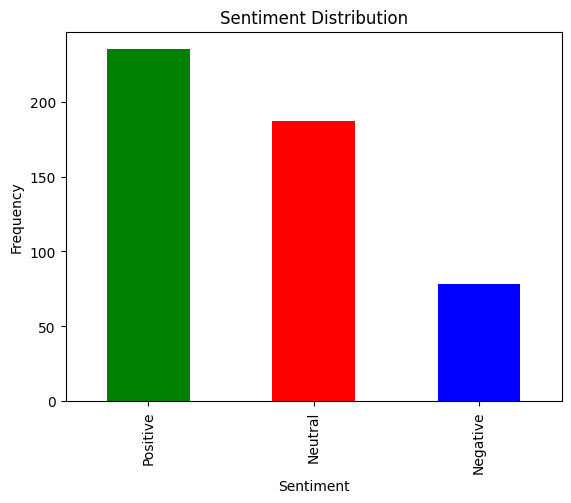

In [ ]:
# Apply sentiment analysis
dfcleaned['SentimentofpostText'] = dfcleaned['sentencedlemmatizedpostText'].apply(analyze_sentiment)

# Display sentiment counts
# Changed from df['Sentiment'] to df['SentimentofpostText']
sentiment_counts = dfcleaned['SentimentofpostText'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

This code generates a word cloud to visualize the most frequent words in the sentencedlemmatizedpostText column of dfcleaned. It first combines all sentences into a single string, then uses the WordCloud library to create a word cloud, where word size indicates frequency. Finally, it displays the word cloud using Matplotlib.

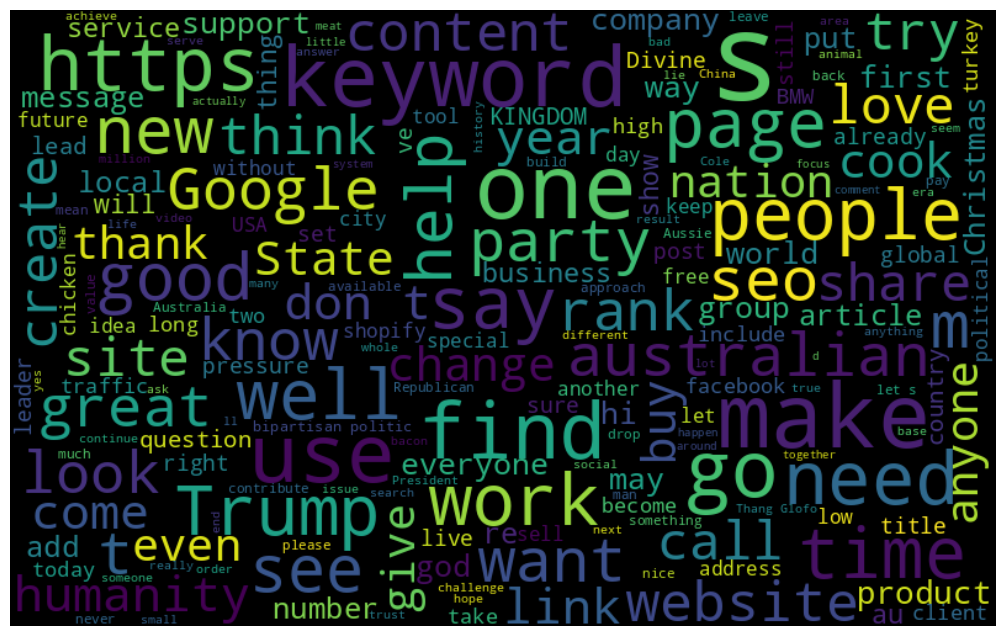

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in dfcleaned['sentencedlemmatizedpostText']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment Analysis for sentencedlemmatizedcommentText column

Sentiment Distribution:
SentimentofcommentText
Neutral     221
Positive    217
Negative     62
Name: count, dtype: int64


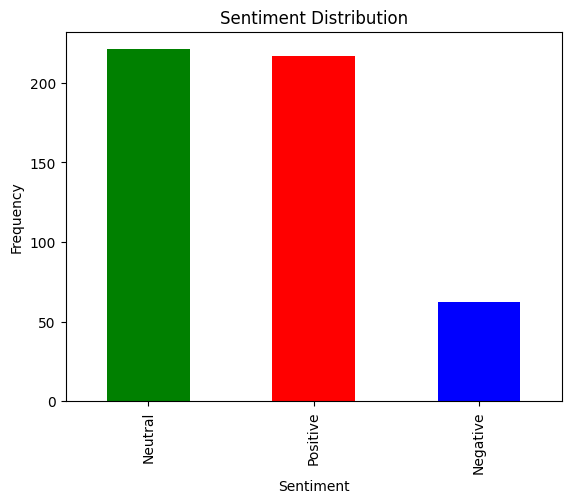

In [ ]:
dfcleaned['SentimentofcommentText'] = dfcleaned['sentencedlemmatizedcommentText'].apply(analyze_sentiment)

# Display sentiment counts
sentiment_counts = dfcleaned['SentimentofcommentText'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

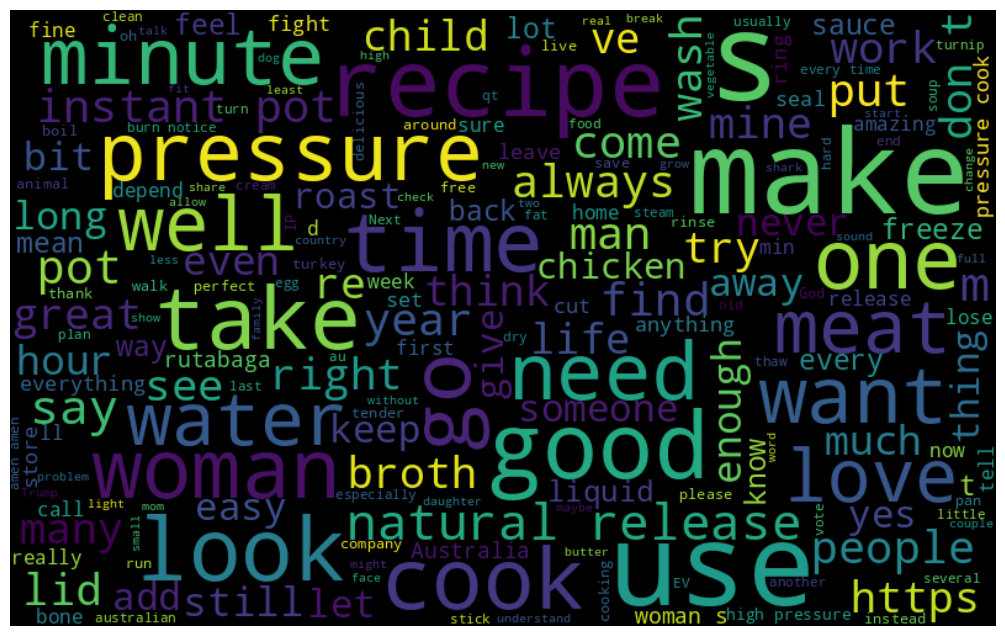

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in dfcleaned['sentencedlemmatizedcommentText']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Making a copy of the dataset for emergency cases.

In [ ]:
df1 = dfcleaned.copy()

# Comment Classification using a Model trained using a Dataset

Since there are specific procedure to handle specific type of hate speech in Facebook community, it will be very important if it can categorize the comments and posts by analyzing them.

Ex:-

*   If a comment contains Hate speech, the comment can be reported , deleted and the user will receive a penalty period.
*   If a comment contains sexual abuse or threats, the user's profile will be suspended after a review done by the Facebook guideline.

This dataset contains labeled comments in categories of toxic, severe_toxic, obscene, threat, insult, identity_hate. After training a model we can categories the comments according to their nature.

Credits :- https://github.com/aswintechguy/Machine-Learning-Projects/blob/master/Toxic%20Comment%20Classification%20-%20Multi%20Label%20-%20NLP/Toxic%20Comment%20Classification%20-%20Multi%20Label%20-%20NLP.ipynb

Importing Dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, classification_report

In [ ]:
import pandas as pd
classificationdf = pd.read_csv('C:/Users/malin/Downloads/New folder (3)/train.csv')
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

Preprocessing the classification dataset

In [ ]:
classificationdf = df.drop(columns=['id'], axis=1)
classificationdf.head()

comment_text  toxic  severe_toxic  \
0  Explanation\nWhy the edits made under my usern...      0             0   
1  D'aww! He matches this background colour I'm s...      0             0   
2  Hey man, I'm really not trying to edit war. It...      0             0   
3  "\nMore\nI can't make any real suggestions on ...      0             0   
4  You, sir, are my hero. Any chance you remember...      0             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        0       0       0              0  
3        0       0       0              0  
4        0       0       0              0

Removing stop words and stemming text

In [ ]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Now you can import and use stopwords
from nltk.corpus import stopwords

# remove stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return " ".join(no_stopword_text)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

# stemming
stemmer = SnowballStemmer('english')
def stemming(sentence):
    stemmed_sentence = ""
    for word in sentence.split():
        stemmed_word = stemmer.stem(word)
        stemmed_sentence += stemmed_word + " "

    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# preprocess the comment
classificationdf['comment_text'] = classificationdf['comment_text'].apply(lambda x: remove_stopwords(x))
classificationdf['comment_text'] = classificationdf['comment_text'].apply(lambda x: clean_text(x))
classificationdf['comment_text'] = classificationdf['comment_text'].apply(lambda x: stemming(x))
classificationdf.head()

comment_text  toxic  severe_toxic  \
0  explan whi edit made usernam hardcor metallica...      0             0   
1  d aww he match background colour i am seem stu...      0             0   
2  hey man i am realli tri edit war it guy consta...      0             0   
3  more i can not make real suggest improv i wond...      0             0   
4         you sir hero ani chanc rememb page that on      0             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        0       0       0              0  
3        0       0       0              0  
4        0       0       0              0

Building the model

In [ ]:
# split input and output
X = classificationdf['comment_text']
y = classificationdf.drop(columns=['comment_text'], axis=1)

In [ ]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def run_pipeline(pipeline, X_train, X_test, y_train, y_test):
    # train model
    pipeline.fit(X_train, y_train)
    # predict from model
    predictions = pipeline.predict(X_test)
    pred_probs = pipeline.predict_proba(X_test)
    # print metrics
    print('roc_auc:', roc_auc_score(y_test, pred_probs))
    print('accuracy:', accuracy_score(y_test, predictions))
    print('classification report')
    print(classification_report(y_test, predictions, target_names=y_train.columns))

Building the pipeline

In [ ]:
NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb_model', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))
])

LR_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb_model', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
])

Checking the accuracy of the model

In [ ]:
run_pipeline(NB_pipeline, X_train, X_test, y_train, y_test)

roc_auc: 0.8604178106899295
accuracy: 0.8997963340122199
classification report
               precision    recall  f1-score   support

        toxic       0.99      0.19      0.32      3056
 severe_toxic       0.00      0.00      0.00       321
      obscene       0.98      0.11      0.20      1715
       threat       1.00      0.01      0.03        74
       insult       0.97      0.05      0.10      1614
identity_hate       0.00      0.00      0.00       294

    micro avg       0.98      0.12      0.22      7074
    macro avg       0.66      0.06      0.11      7074
 weighted avg       0.90      0.12      0.21      7074
  samples avg       0.02      0.01      0.01      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
run_pipeline(LR_pipeline, X_train, X_test, y_train, y_test)

roc_auc: 0.9788611968418081
accuracy: 0.9180322732257559
classification report
               precision    recall  f1-score   support

        toxic       0.90      0.62      0.74      3056
 severe_toxic       0.58      0.28      0.37       321
      obscene       0.92      0.64      0.75      1715
       threat       0.62      0.14      0.22        74
       insult       0.81      0.50      0.62      1614
identity_hate       0.70      0.16      0.26       294

    micro avg       0.87      0.56      0.68      7074
    macro avg       0.75      0.39      0.50      7074
 weighted avg       0.86      0.56      0.67      7074
  samples avg       0.06      0.05      0.05      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text prediction

In [ ]:
labels = y_train.columns.values

Checking the classification by using the comment texts

In [ ]:
sentence = 'I grew up calling this rutabaga. fuck We had it yesterday on Thanksgiving and my daughter remarked, we are the only family in America eating this!🤣(shes 32).  Growing up, it was a staple on Sundays as we always had a roast dinner.  The IP has made it a game changer!  Won’t cook it any other way now.'
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
for label, result in zip(labels, results):
    print("%14s %5s" % (label, result))

         toxic     1
  severe_toxic     0
       obscene     0
        threat     0
        insult     0
 identity_hate     0


In [ ]:
sentence = '''I'm an artist and I have a house full of my own work. I'm constantly begging and pleading my adult children that when I'm gone they should keep a couple things, sell what they can, then donate the rest
I poured myself into them, worked really hard, and I'm only afraid they will end up in a storage unit, unloved. Donation is way better, because someone like you will come along who really loves it!'''
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
for label, result in zip(labels, results):
    print("%14s %5s" % (label, result))

         toxic     0
  severe_toxic     0
       obscene     0
        threat     0
        insult     0
 identity_hate     0


In [ ]:
sentence = 'these pics make me feel stupid like i’m resting my head on his belly looking up at him as he’s looking down on me'
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
for label, result in zip(labels, results):
    print("%14s %5s" % (label, result))

         toxic     1
  severe_toxic     0
       obscene     0
        threat     0
        insult     1
 identity_hate     0


In [ ]:
sentence = '''Should do. But the question you need to ask is why and how did someone achieve this? And can they do it again. Most hacks are done for some sort of gain, and submitting a removal request doesn't seem like the most beneficial thing a hacker could/would do. If this happens to me will fucking kill them'''
stemmed_sentence = stemming(sentence)
results = LR_pipeline.predict([stemmed_sentence])[0]
for label, result in zip(labels, results):
    print("%14s %5s" % (label, result))

         toxic     1
  severe_toxic     0
       obscene     1
        threat     0
        insult     0
 identity_hate     0


ROC Curve

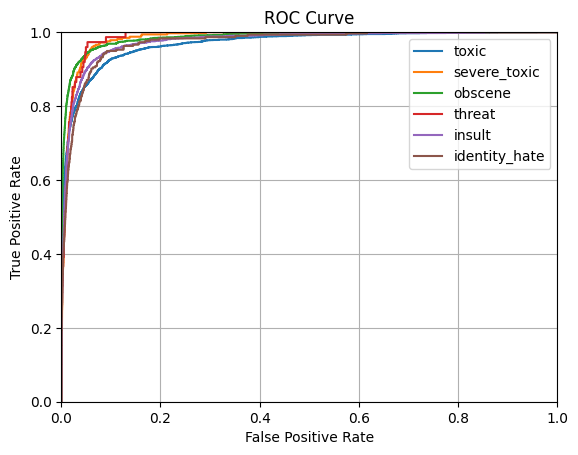

In [36]:
def plot_roc_curve(test_labels, predict_prob):
    fpr, tpr, thresholds = roc_curve(test_labels, predict_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(labels)

def plot_pipeline_roc_curve(pipeline, X_train, X_test, y_train, y_test):
    for label in labels:
        pipeline.fit(X_train, y_train[label])
        pred_probs = pipeline.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test[label], pred_probs)

plot_pipeline_roc_curve(LR_pipeline, X_train, X_test, y_train, y_test)

# Task 5: Topic Modeling

Topic Modeling for 'sentencedlemmatizedcommentText' column

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')  # Adjust thresholds
dtm = vectorizer.fit_transform(df1['sentencedlemmatizedcommentText'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # Adjust n_components (number of topics)
lda.fit(dtm)

# Extract topics and keywords
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = keywords
    return topics

no_top_words = 5
keywords = vectorizer.get_feature_names_out()
topics = display_topics(lda, keywords, no_top_words)

# Assign a topic to each sentence
topic_assignments = lda.transform(dtm)  # Get topic probabilities for each sentence
df1['Assigned_Topic'] = topic_assignments.argmax(axis=1) + 1  # Assign the topic with the highest probability # Changed df to df1

# Map assigned topics to keywords for interpretation
topic_keywords = {idx + 1: ', '.join(words) for idx, words in enumerate(topics.values())}
df1['commentTopic_Keywords'] = df1['Assigned_Topic'].map(topic_keywords) # Changed df to df1

In [ ]:
df1[['sentencedlemmatizedcommentText','commentTopic_Keywords']]

sentencedlemmatizedcommentText  \
0    oh   no   not bloodline   whatever do    recli...   
1                   that s lot word   no one sleep I     
2                               just another way shame   
3          speak like old resentful man best way woman   
4    I don t know ancestor fight mountain lion   I ...   
..                                                 ...   
495         Palm Outdoor Australian own make   caravan   
496  Krix Australian make owned speaker manufacture...   
497  crochet plant make lovely desk ornament   I al...   
498                              t s Creative Emporium   
499                                         cool loose   

              commentTopic_Keywords  
0    make, use, pressure, pot, cook  
1    make, use, pressure, pot, cook  
2    make, use, pressure, pot, cook  
3     woman, love, man, say, people  
4     woman, love, man, say, people  
..                              ...  
495  make, use, pressure, pot, cook  
496  make, use, pressure, pot, cook  
497  make, use, pressure, pot, cook  
498  make, use, pressure, pot, cook  
499  make, use, pressure, pot, cook  

[500 rows x 2 columns]


Topic Modeling for 'sentencedlemmatizedpostText' column

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')  # Adjust thresholds
dtm = vectorizer.fit_transform(df1['sentencedlemmatizedpostText'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # Adjust n_components (number of topics)
lda.fit(dtm)

# Extract topics and keywords
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = keywords
    return topics

no_top_words = 5
keywords = vectorizer.get_feature_names_out()
topics = display_topics(lda, keywords, no_top_words)

# Assign a topic to each sentence
topic_assignments = lda.transform(dtm)  # Get topic probabilities for each sentence
df1['Assigned_Topic'] = topic_assignments.argmax(axis=1) + 1  # Assign the topic with the highest probability

# Map assigned topics to keywords for interpretation
topic_keywords = {idx + 1: ', '.join(words) for idx, words in enumerate(topics.values())}
df1['postTopic_Keywords'] = df1['Assigned_Topic'].map(topic_keywords)

In [ ]:
df1[['sentencedlemmatizedpostText','postTopic_Keywords']]

sentencedlemmatizedpostText  \
0                                             mic join   
1    https    www borowitzreport com p kari lake ca...   
2                                           Mmmm         
3                          Smokheads545 7251971 need 3   
4    Green Party Tennessee    the party people   pl...   
..                                                 ...   
495                                    I m 79 look old   
496  feel like Cinderella want freedom      fair   ...   
497  the original version Beauty Beast commentary w...   
498                               you never disappoint   
499                  so didn t live happily ever after   

                    postTopic_Keywords  
0    com, https, www, make, australian  
1    com, https, www, make, australian  
2      keyword, trump, work, help, seo  
3    com, https, www, make, australian  
4    com, https, www, make, australian  
..                                 ...  
495  com, https, www, make, australian  
496    keyword, trump, work, help, seo  
497  com, https, www, make, australian  
498    keyword, trump, work, help, seo  
499  com, https, www, make, australian  

[500 rows x 2 columns]

# Task 6: Stylometric Analysis and Visualization

PCA analysis for sentencedlemmatizedcommentText column

 Extract up to 50 most frequent words in sentencedlemmatizedcommentText column

Extracted Features (Top 50 words):
['add' 'amen' 'away' 'bit' 'broth' 'child' 'com' 'come' 'cook' 'delicious'
 'don' 'good' 'great' 'high' 'hour' 'https' 'instant' 'lid' 'life' 'like'
 'long' 'look' 'love' 'make' 'man' 'meat' 'minute' 'natural' 'need'
 'people' 'pot' 'pressure' 'recipe' 'release' 'right' 'roast' 'say'
 'thing' 'think' 'time' 'try' 'use' 've' 'want' 'wash' 'water' 'woman'
 'work' 'www' 'year']

Feature matrix shape: (500, 50)


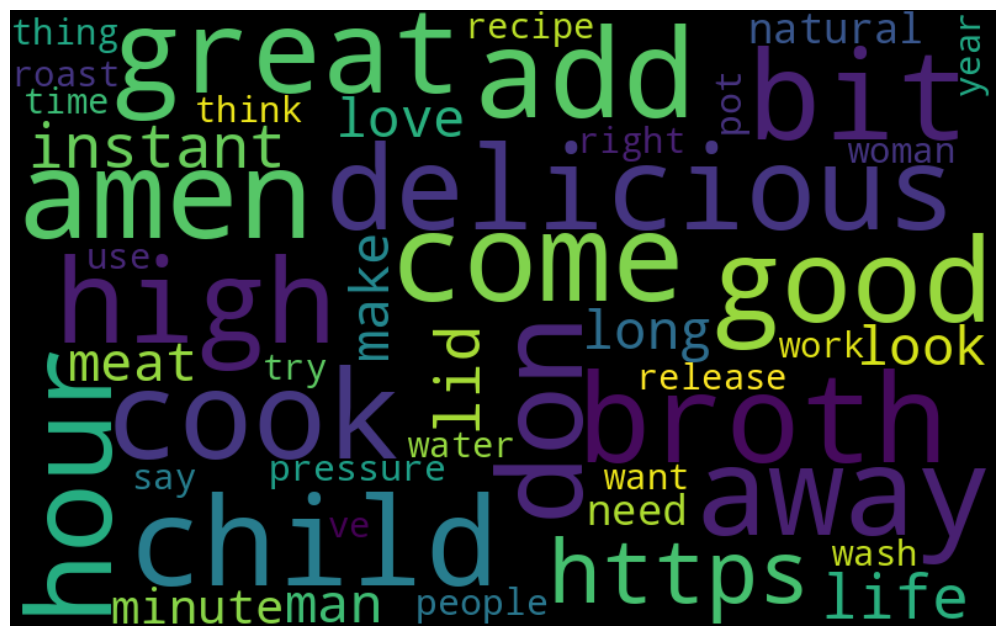

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Feature Extraction (Stylometric Features)
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features=50)  # Extract up to 50 most frequent words
X = vectorizer.fit_transform(df1['sentencedlemmatizedcommentText']).toarray()  # Convert text to feature matrix

# Display extracted features
feature_names = vectorizer.get_feature_names_out()
print("Extracted Features (Top 50 words):")
print(feature_names)

# Check the shape of the resulting matrix
print(f"\nFeature matrix shape: {X.shape}")

# visualize the frequent words
all_words = " ".join([sentence for sentence in feature_names])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

In [ ]:
 #K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters
df1['commentCluster'] = kmeans.fit_predict(X)

Scatterplot creation for commentCluster column

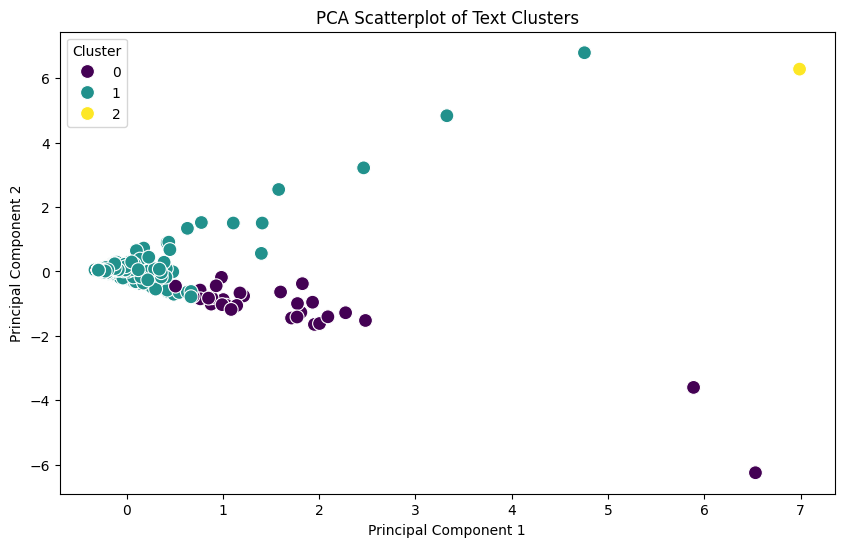

In [ ]:
# PCA Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['commentCluster'], palette='viridis', s=100)
plt.title('PCA Scatterplot of Text Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Dendrogram creation for sentencedlemmatizedcommentText column

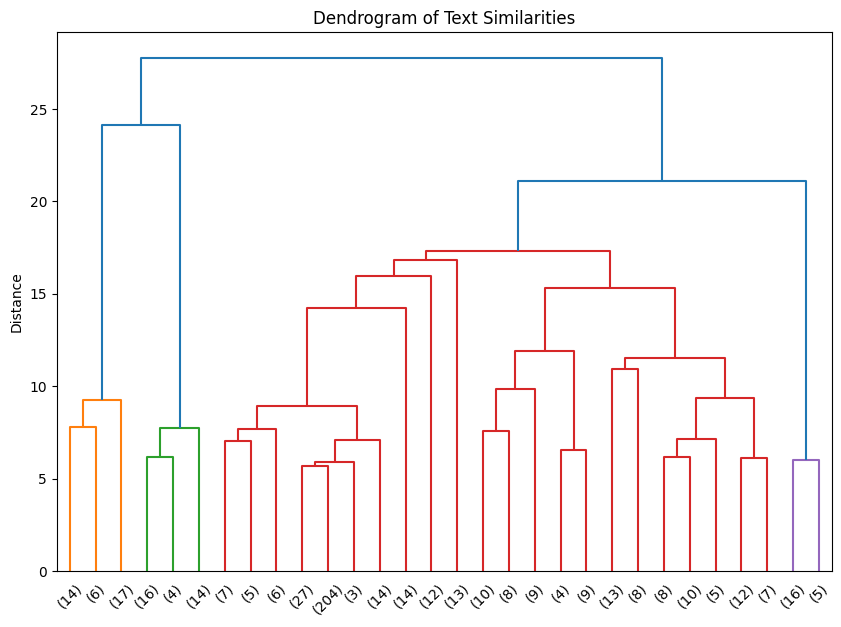

In [ ]:
#  Dendrogram for Hierarchical Clustering
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine_similarity

# Calculate cosine similarity matrix (distance matrix)
distances = 1 - cosine_similarity(X)  # Convert similarity to distance

# Perform linkage on the distance matrix
linked = linkage(distances, method='ward')  # Hierarchical clustering

plt.figure(figsize=(10, 7))

# Use truncate_mode to limit the dendrogram size
dendrogram(linked,
           labels=df1['sentencedlemmatizedcommentText'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # Show only the last 'p' merged clusters
           p=30  # Display 30
           )

plt.title('Dendrogram of Text Similarities')

plt.ylabel('Distance')
plt.show()

Using 'TfidfVectorizer' module to extract top 50 Important Words in the sentencedlemmatizedcommentText column

Top 50 Important Words (Based on TF-IDF) from LemmatizedHeadline:
['add' 'amen' 'away' 'bit' 'broth' 'child' 'com' 'come' 'cook' 'delicious'
 'don' 'good' 'great' 'high' 'hour' 'https' 'instant' 'lid' 'life' 'like'
 'long' 'look' 'love' 'make' 'man' 'meat' 'minute' 'natural' 'need'
 'people' 'pot' 'pressure' 'recipe' 'release' 'right' 'roast' 'say'
 'thing' 'think' 'time' 'try' 'use' 've' 'want' 'wash' 'water' 'woman'
 'work' 'www' 'year']

TF-IDF Feature Matrix Shape: (500, 50)


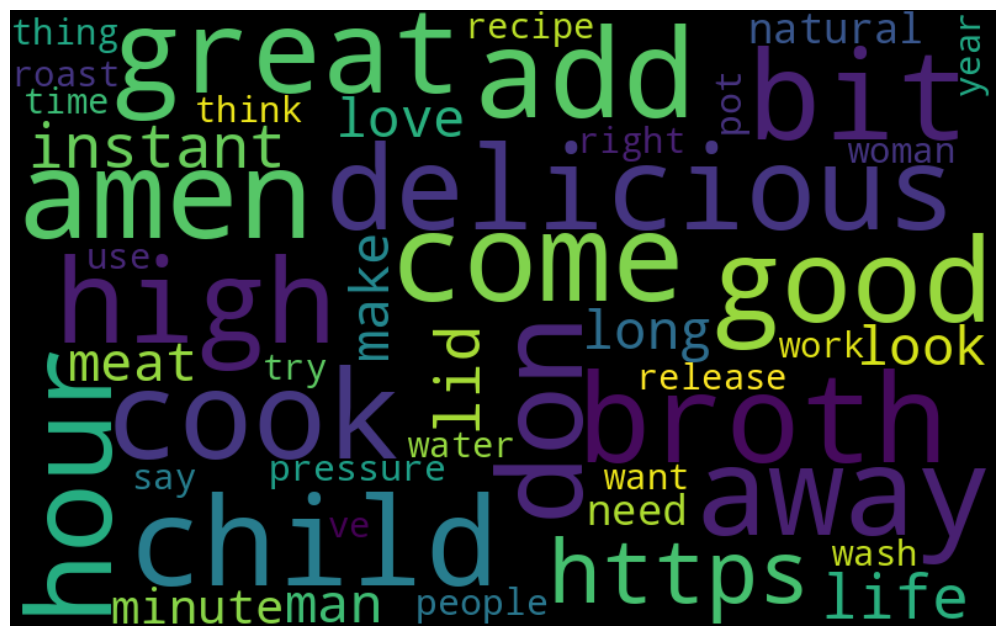

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer (same as CountVectorizer but with TF-IDF)
vectorizer2 = TfidfVectorizer(stop_words='english', max_features=50)  # Top 50 most important words based on TF-IDF
X_tfidf = vectorizer2.fit_transform(df1['sentencedlemmatizedcommentText']).toarray()  # Convert text to TF-IDF feature matrix

# Retrieve the feature names (words)
top_words = vectorizer2.get_feature_names_out()

# Display the most important words
print("Top 50 Important Words (Based on TF-IDF) from LemmatizedHeadline:")
print(top_words)

# Display the shape of the resulting matrix
print(f"\nTF-IDF Feature Matrix Shape: {X_tfidf.shape}")

# visualize the frequent words
all_words = " ".join([sentence for sentence in feature_names])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Extract up to 50 most frequent words in sentencedlemmatizedpostText column

Extracted Features (Top 50 words):
['australian' 'bipartisan' 'business' 'buy' 'com' 'come' 'content' 'cook'
 'create' 'don' 'global' 'good' 'google' 'great' 'help' 'https' 'humanity'
 'keyword' 'know' 'let' 'like' 'link' 'look' 'love' 'make' 'need' 'new'
 'page' 'party' 'peace' 'people' 'product' 'rank' 'say' 'search' 'seo'
 'service' 'share' 'site' 'think' 'time' 'trump' 'try' 'use' 'want' 'way'
 'website' 'work' 'www' 'year']

Feature matrix shape: (500, 50)


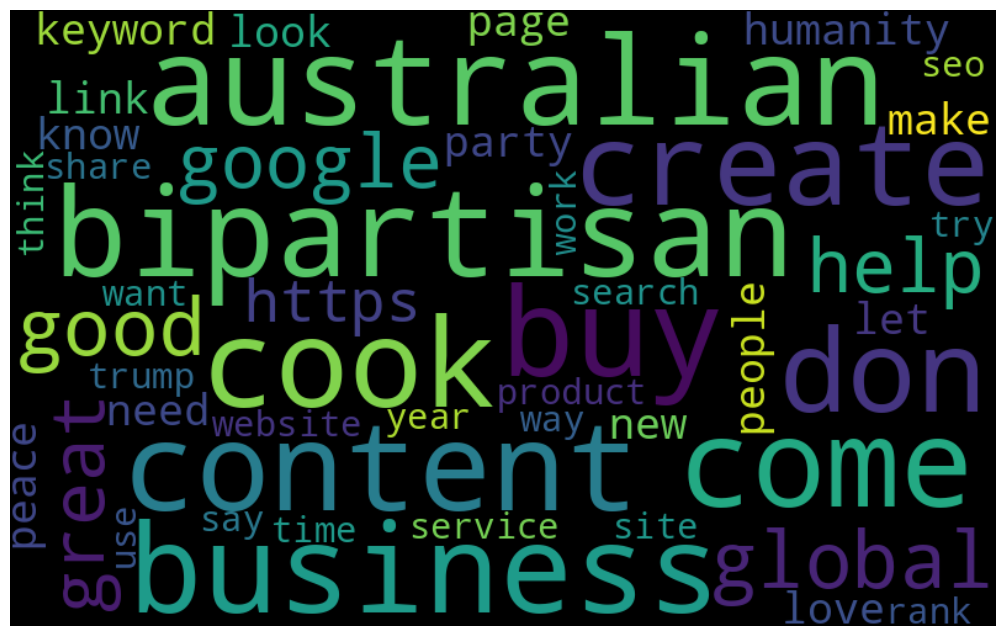

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Feature Extraction (Stylometric Features)
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features=50)  # Extract up to 50 most frequent words
X = vectorizer.fit_transform(df1['sentencedlemmatizedpostText']).toarray()  # Convert text to feature matrix

# Display extracted features
feature_names = vectorizer.get_feature_names_out()
print("Extracted Features (Top 50 words):")
print(feature_names)

# Check the shape of the resulting matrix
print(f"\nFeature matrix shape: {X.shape}")

# visualize the frequent words
all_words = " ".join([sentence for sentence in feature_names])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

In [ ]:
 #K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters
df1['postCluster'] = kmeans.fit_predict(X)

Scatterplot creation for postCluster column

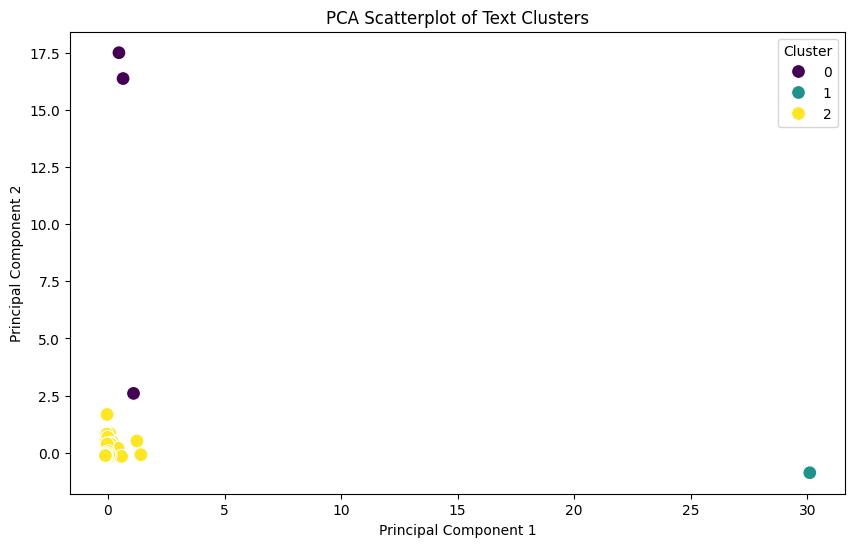

In [ ]:
# PCA Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['postCluster'], palette='viridis', s=100)
plt.title('PCA Scatterplot of Text Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Dendrogram creation for sentencedlemmatizedpostText column

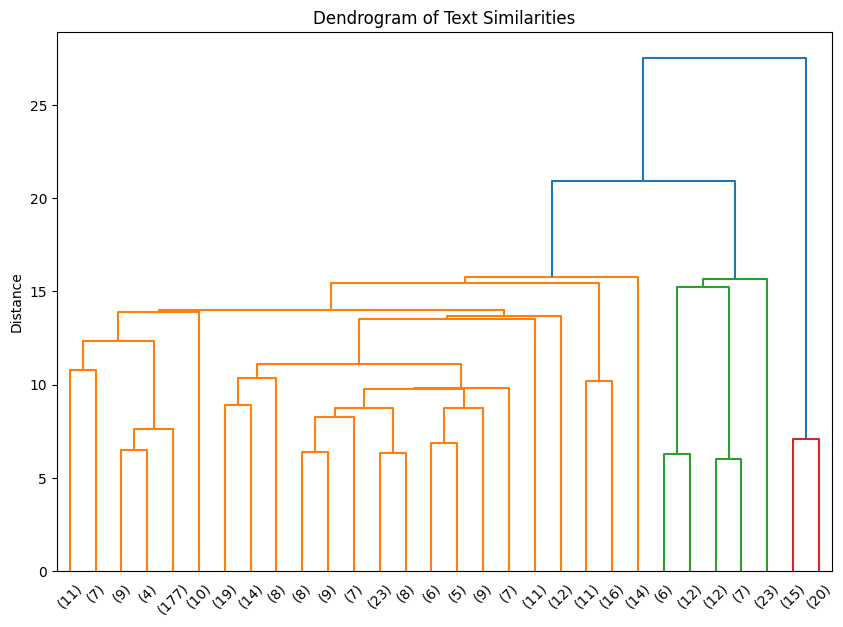

In [ ]:
#  Dendrogram for Hierarchical Clustering
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine_similarity

# Calculate cosine similarity matrix (distance matrix)
distances = 1 - cosine_similarity(X)  # Convert similarity to distance

# Perform linkage on the distance matrix
linked = linkage(distances, method='ward')  # Hierarchical clustering

plt.figure(figsize=(10, 7))

# Use truncate_mode to limit the dendrogram size
dendrogram(linked,
           labels=df1['sentencedlemmatizedpostText'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # Show only the last 'p' merged clusters
           p=30  # Display 30
           )

plt.title('Dendrogram of Text Similarities')

plt.ylabel('Distance')
plt.show()

Using 'TfidfVectorizer' module to extract top 50 Important Words in the sentencedlemmatizedcommentText column

Top 50 Important Words (Based on TF-IDF) from LemmatizedHeadline:
['australian' 'bipartisan' 'business' 'buy' 'com' 'come' 'content' 'cook'
 'create' 'don' 'global' 'good' 'google' 'great' 'help' 'https' 'humanity'
 'keyword' 'know' 'let' 'like' 'link' 'look' 'love' 'make' 'need' 'new'
 'page' 'party' 'peace' 'people' 'product' 'rank' 'say' 'search' 'seo'
 'service' 'share' 'site' 'think' 'time' 'trump' 'try' 'use' 'want' 'way'
 'website' 'work' 'www' 'year']

TF-IDF Feature Matrix Shape: (500, 50)


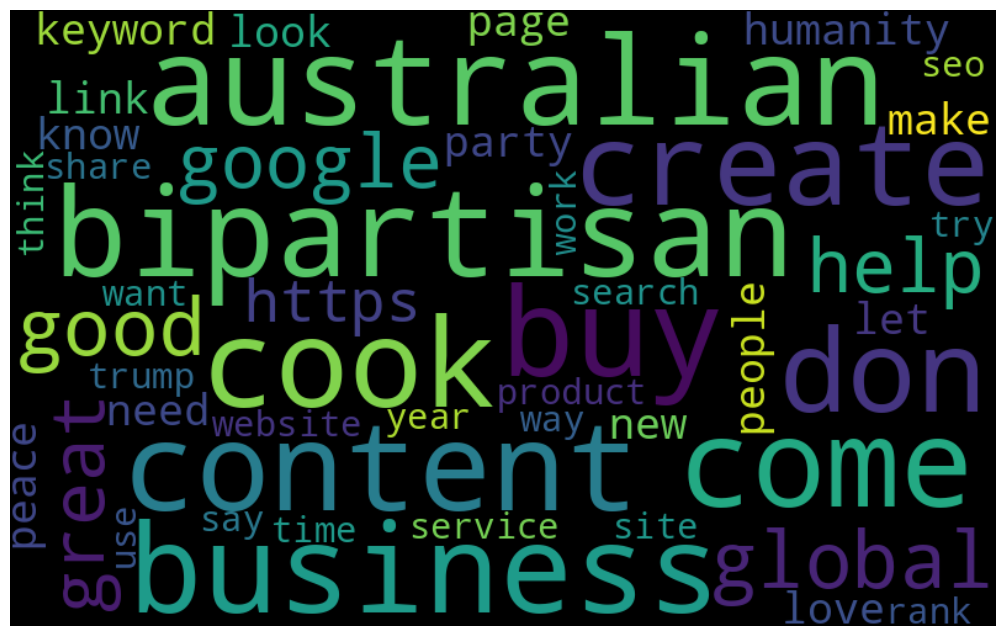

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer (same as CountVectorizer but with TF-IDF)
vectorizer2 = TfidfVectorizer(stop_words='english', max_features=50)  # Top 50 most important words based on TF-IDF
X_tfidf = vectorizer2.fit_transform(df1['sentencedlemmatizedpostText']).toarray()  # Convert text to TF-IDF feature matrix

# Retrieve the feature names (words)
top_words = vectorizer2.get_feature_names_out()

# Display the most important words
print("Top 50 Important Words (Based on TF-IDF) from LemmatizedHeadline:")
print(top_words)

# Display the shape of the resulting matrix
print(f"\nTF-IDF Feature Matrix Shape: {X_tfidf.shape}")

# visualize the frequent words
all_words = " ".join([sentence for sentence in feature_names])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 7: Document Clustering with Word2Vec or Doc2Vec

This pipeline provides insights into the semantic structure of the text data by grouping similar sentences/documents. Using Word2Vec for vectorization ensures that semantic meaning is captured, while K-Means and t-SNE allow effective clustering and visualization.

For sentencedlemmatizedpostText column

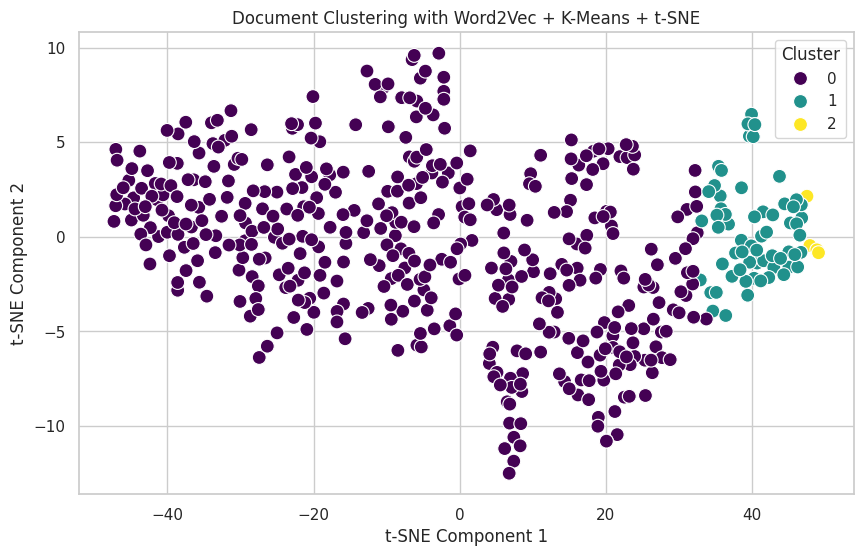


Clustered Documents:

Cluster 0:
 - mic join
 - https    www borowitzreport com p kari lake call it totally unfair r 3ju40n utm campaign post utm medium web PHOENIX   the Borowitz Report   after fail bid US Senate make two time loser   irate Kari Lake complain Monday   totally unfair   Republican Party suddenly decide accept election result    I think go frivolous lawsuit baseless claim voter fraud like always do    say    I long recognize Republican Party     where election denier need they    ask Lake   call   an election deni deni     where s QAnon Shaman    demand    where s Ginni Thomas   I haven t see one frickin   Proud boy march I   you people suck  
 - Green Party Tennessee    the party people   planet peace   https    www facebook com greenpartyoftennessee
 - end violence girl woman worldwide  
 - father matter   
 - his bid table immediately    he vet properly qualified operate Town Hempstead Animal shelter    he find guiltly animal abuse   
 - fantastic footage   thank sha

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the visualization style
sns.set(style="whitegrid")


#Train Word2Vec model
# Train Word2Vec on tokenized sentences
word2vec_model = Word2Vec(sentences=df1['sentencedlemmatizedpostText'], vector_size=50, window=5, min_count=1, workers=4)

# Helper Function: Create document vectors by averaging word embeddings
def get_average_word_vector(tokens, model):
    # Create vector by averaging word embeddings
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:  # Handle empty token cases
        return np.zeros(50)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

df1['doc_vector'] = df1['sentencedlemmatizedpostText'].apply(lambda x: get_average_word_vector(x, word2vec_model))

# Convert document vectors into a feature matrix
doc_vectors = np.array(list(df1['doc_vector']))

# Apply K-Means Clustering
n_clusters = 3  # Set number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df1['cluster'] = kmeans.fit_predict(doc_vectors)

# Dimensionality Reduction with t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(doc_vectors)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df1['cluster'], palette="viridis", s=100)
plt.title("Document Clustering with Word2Vec + K-Means + t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

# Display the clustered documents
print("\nClustered Documents:")
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id}:")
    # Assuming 'sentencedlemmatizedpostText' contains the text data you want to display
    cluster_texts = df1[df1['cluster'] == cluster_id]['sentencedlemmatizedpostText'].tolist()  # Changed 'text_samples' to 'sentencedlemmatizedpostText'
    for text in cluster_texts:
        print(f" - {text}")

For sentencedlemmatizedcommentText column

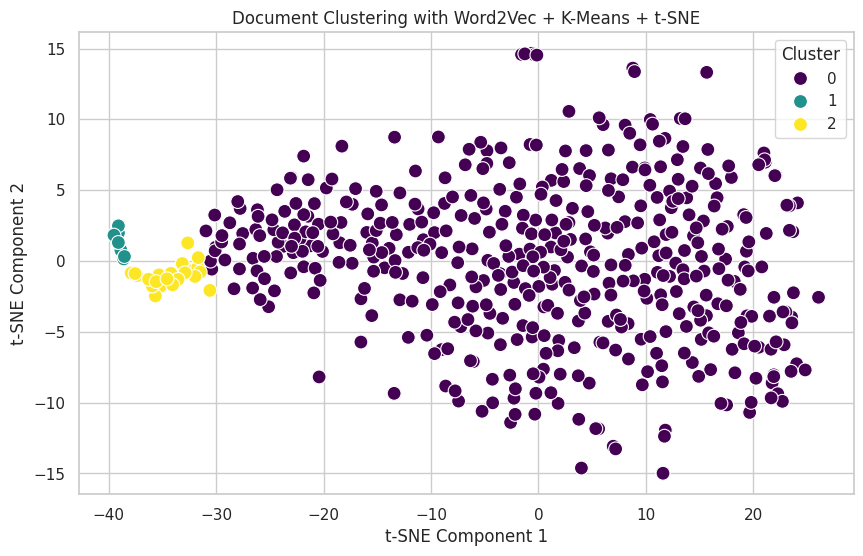


Clustered Documents:

Cluster 0:
 - oh   no   not bloodline   whatever do    recline fainting couch
 - that s lot word   no one sleep I  
 - just another way shame
 - speak like old resentful man best way woman
 - I don t know ancestor fight mountain lion   I know   paternal   Grandma fight wind weather bring crop feed child grandfather chase woman booze   I know   maternal   Grandmother   great aunt   great grandmother fight patriarchy vote   education   job opportunity   fight I fight entire adult life continue fight whatever year remain I   my daughter also fight good fight   those crow foot badge honor sign life well live
 - some idiot never understand even worth time effort give hoot
 - the audacity   walk womb that s it    
 - the fact I m still attract man prove sexuality isn t choice
 - I lot show life   10 year high education   I own 2 business   piano teacher   work number 2 university Florida number 1    time   division 2 football team country   I spend many year spiritual 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the visualization style
sns.set(style="whitegrid")


#Train Word2Vec model
# Train Word2Vec on tokenized sentences
word2vec_model = Word2Vec(sentences=df1['sentencedlemmatizedcommentText'], vector_size=50, window=5, min_count=1, workers=4)

# Helper Function: Create document vectors by averaging word embeddings
def get_average_word_vector(tokens, model):
    # Create vector by averaging word embeddings
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:  # Handle empty token cases
        return np.zeros(50)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

df1['doc_vector'] = df1['sentencedlemmatizedcommentText'].apply(lambda x: get_average_word_vector(x, word2vec_model))

# Convert document vectors into a feature matrix
doc_vectors = np.array(list(df1['doc_vector']))

# Apply K-Means Clustering
n_clusters = 3  # Set number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df1['cluster'] = kmeans.fit_predict(doc_vectors)

# Dimensionality Reduction with t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(doc_vectors)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df1['cluster'], palette="viridis", s=100)
plt.title("Document Clustering with Word2Vec + K-Means + t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

# Display the clustered documents
print("\nClustered Documents:")
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id}:")
    # Assuming 'sentencedlemmatizedpostText' contains the text data you want to display
    cluster_texts = df1[df1['cluster'] == cluster_id]['sentencedlemmatizedcommentText'].tolist()  # Changed 'text_samples' to 'sentencedlemmatizedpostText'
    for text in cluster_texts:
        print(f" - {text}")

# Task 8: Dependency Parsing and Advanced Structures

This code performs dependency parsing on the first three sentences of the sentencedlemmatizedcommentText column using spaCy. For each sentence, it extracts the token text, dependency relation, head word, and Part-of-Speech tag, displaying this information in a table. It then uses displacy to visually show the sentence structure with arrows indicating dependencies, making it easy to identify the root verb, subjects, objects, and modifiers in the text.

In [ ]:
import spacy
from spacy import displacy
import pandas as pd

# Load English model
nlp = spacy.load("en_core_web_sm")

#Perform Dependency Parsing

def parse_sentence(sentence):
    # Changed from df2['sentencedlemmatizedpostText'] to sentence
    doc = nlp(sentence)
    parsed_data = []
    for token in doc:
        parsed_data.append({
            "Token": token.text,
            "Dependency": token.dep_,
            "Head": token.head.text,
            "POS": token.pos_
        })
    return pd.DataFrame(parsed_data)

# Analyze the first few sentences for dependency parsing
print("Dependency Parsing for Sample Sentences:")
for idx, sentence in enumerate(df1['sentencedlemmatizedcommentText'][:3]):  # Limit to first 3 sentences
    print(f"\nSentence {idx + 1}: {sentence}")
    print(parse_sentence(sentence))

# Visualize Dependency Parsing
print("\nGenerating Dependency Visualizations...")
for idx, sentence in enumerate(df1['sentencedlemmatizedcommentText'][:3]):  # Limit to first 3 sentences
    doc = nlp(sentence)
    print(f"\nSentence {idx + 1}: {sentence}")
    displacy.render(doc, style="dep", jupyter=True, options={"distance": 90})

Dependency Parsing for Sample Sentences:

Sentence 1: oh   no   not bloodline   whatever do    recline fainting couch
        Token Dependency       Head    POS
0          oh       intj  bloodline   INTJ
1                    dep         oh  SPACE
2          no        det  bloodline    DET
3                    dep         no  SPACE
4         not        neg  bloodline   PART
5   bloodline       ROOT  bloodline   NOUN
6                    dep  bloodline  SPACE
7    whatever      nsubj    recline   PRON
8          do        aux    recline    AUX
9                    dep         do  SPACE
10    recline      ccomp  bloodline   VERB
11   fainting       amod      couch   NOUN
12      couch       dobj    recline   NOUN

Sentence 2: that s lot word   no one sleep I  
   Token Dependency   Head    POS
0   that      nsubj      s   PRON
1      s       ROOT      s   VERB
2    lot   compound   word   NOUN
3   word       attr      s   NOUN
4               dep   word  SPACE
5     no        det    one  


Sentence 2: that s lot word   no one sleep I  



Sentence 3: just another way shame


# Bonus Task: Implement an Advanced NLP Technique

Text Summarization

In [ ]:
from transformers import pipeline


# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

dfsum = df1.head(10)

# Function to summarize text
def summarize_text(text):
    try:
        # Perform summarization
        summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        # Return the original text in case of an error
        return text

# Apply summarization to the 'commentText' column
dfsum['summarizedCommentText'] = dfsum['sentencedlemmatizedcommentText'].apply(summarize_text)

In [ ]:
dfsum[['sentencedlemmatizedcommentText','summarizedCommentText']]

sentencedlemmatizedcommentText  \
0  oh   no   not bloodline   whatever do    recli...   
1                 that s lot word   no one sleep I     
2                             just another way shame   
3        speak like old resentful man best way woman   
4  I don t know ancestor fight mountain lion   I ...   
5  some idiot never understand even worth time ef...   
6             the audacity   walk womb that s it       
7  the fact I m still attract man prove sexuality...   
8  I lot show life      year high education   I o...   
9  but many   mag man   provide well life child  ...   

                               summarizedCommentText  
0  Oh   no   not bloodline   whatever do    recli...  
1   that s a lot word   no one sleep I    I'm not...  
2  CNN.com will feature iReporter photos in a wee...  
3  CNN.com will feature iReporter photos in a wee...  
4  I don t know ancestor fight mountain lion   I ...  
5  Some idiot never understand even worth time ef...  
6  The audacity   walk womb that s it. The audaci...  
7  "The fact I m still attract man prove sexualit...  
8  "I spend life teach   nurture   guide child" "...  
9  Many   mag man provide well life child   and t...

Machine Translation

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
import pandas as pd

# Step 1: Load Pre-trained MarianMT Model for English-to-French Translation
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

dftrans = df1.head(10)

# Define a Function for Translation
def translate_text(text, tokenizer, model):
    try:
        # Tokenize input text
        tokenized_text = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        # Generate translation
        translated = model.generate(**tokenized_text)
        # Decode translation to text
        return tokenizer.decode(translated[0], skip_special_tokens=True)
    except Exception as e:
        return str(e)  # Handle any translation errors gracefully

# Translate the `commentText` Column and Save in a New Column
dftrans['translatedCommentText'] = dftrans['sentencedlemmatizedcommentText'].apply(lambda x: translate_text(x, tokenizer, model))

In [ ]:
dftrans[['sentencedlemmatizedcommentText','translatedCommentText']]

sentencedlemmatizedcommentText  \
0  oh   no   not bloodline   whatever do    recli...   
1                 that s lot word   no one sleep I     
2                             just another way shame   
3        speak like old resentful man best way woman   
4  I don t know ancestor fight mountain lion   I ...   
5  some idiot never understand even worth time ef...   
6             the audacity   walk womb that s it       
7  the fact I m still attract man prove sexuality...   
8  I lot show life      year high education   I o...   
9  but many   mag man   provide well life child  ...   

                               translatedCommentText  
0  Oh non, pas de sang, quoi qu'il en soit, évano...  
1                                    Je ne dors pas.  
2                     juste une autre façon de honte  
3  parler comme un vieil homme rancunier meilleur...  
4  Je ne sais pas l'ancêtre combat lion de montag...  
5  certains idiots ne comprennent jamais même la ...  
6                l'audace marche le ventre qui l'est  
7  Le fait que j'attire toujours l'homme prouve q...  
8  I lot show life year high education I own busi...  
9  mais beaucoup d'homme de mag fournissent bien ...

Transformer-based models

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd

# Load Pre-trained T5 Model
model_name = "t5-small"  # You can also use "t5-base" or "t5-large" for better performance
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Define a Function for Summarization
def summarize_text(text, max_input_length=512, max_output_length=150):
    try:
        # Preprocess input
        input_text = f"summarize: {text}"
        inputs = tokenizer(input_text, return_tensors="pt", max_length=max_input_length, truncation=True)

        # Generate summary
        summary_ids = model.generate(inputs["input_ids"], max_length=max_output_length, num_beams=4, early_stopping=True)

        # Decode and return the summary
        return tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        return str(e)  # Handle any errors gracefully

dfmodel = df1.head(10)

# Apply Summarization to the `commentText` Column
dfmodel['modelCommentText'] = dfmodel['sentencedlemmatizedcommentText'].apply(lambda x: summarize_text(x))



In [ ]:
dfmodel[['sentencedlemmatizedcommentText','modelCommentText']]

sentencedlemmatizedcommentText  \
0  oh   no   not bloodline   whatever do    recli...   
1                 that s lot word   no one sleep I     
2                             just another way shame   
3        speak like old resentful man best way woman   
4  I don t know ancestor fight mountain lion   I ...   
5  some idiot never understand even worth time ef...   
6             the audacity   walk womb that s it       
7  the fact I m still attract man prove sexuality...   
8  I lot show life      year high education   I o...   
9  but many   mag man   provide well life child  ...   

                                    modelCommentText  
0          recline fainting couch. recline fainting.  
1  thats lot word no one sleeps I'm a s lot word ...  
2                             just another way shame  
3  speak like old resentful man best way woman. s...  
4  ancestor fight mountain lion I know paternal g...  
5  some idiot never understand even worth time ef...  
6             the audacity walk womb that s it s it.  
7  the fact I m still attract man prove sexuality...  
8  my ex husband beat we rape daughter he prison ...  
9  many mag man provide well life child and thise...

Datasets and documentation: -

https://github.com/malindu101/PUSL3189-Natural-Language-Processing